In [1]:
# Import modules
import os
import sys
sys.path.append(r'..\Hardware_src') # Make the change according to your path

# Python modules for figure visualization
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import io
from scipy import signal
import math
import cv2
import screeninfo
from scipy.linalg import hadamard    
from scipy.optimize import minimize
from pathlib import Path

## M = N

### 1D Identity Reconstruction

In [3]:
# Load data
file_path = Path(os.getcwd())
data_path = file_path.joinpath('C:/Users/russe/OneDrive - Johns Hopkins/imaging instrumentation/FinalProj')

black_subtract_1d = np.loadtxt(data_path.joinpath('black_subtract_1d_59.csv'), delimiter=',')
black_subtract_1d = black_subtract_1d.reshape(1024,1280,16)
mask1d = np.loadtxt(data_path.joinpath('mask_1d_59.csv'), delimiter=',')
mask1d = mask1d.reshape(16,16,16)
scene_1d = np.loadtxt(data_path.joinpath('scene_1d_59.csv'), delimiter=',')
scene_1d = scene_1d.reshape(1024,1280,16)

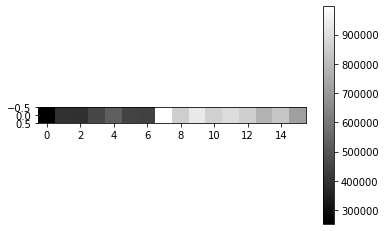

In [4]:
# Create Y and A matrix
# Subtract ambient lighting
# row in scence image, 500 - 545,
# column in scene image, 269 - 1021, 47 for each pattern
black_corrected = np.zeros([1024,1280])
Y = np.zeros([16,1])
A_1d_id = np.identity(16)
Y_1d_id = np.zeros([16,1])

for i in range(16):
    # subtract ambient lighting
    black_corrected[:,:] = scene_1d[:,:,i] - black_subtract_1d[:,:,i]
    Y_1d_id[i,0] = np.sum(black_corrected[500:545,269:1021])

A_inv_1d_id = np.linalg.pinv(A_1d_id, rcond=1e-1)
X_1d_id = np.matmul(A_inv_1d_id, Y_1d_id)
plt.imshow(np.transpose(X_1d_id), cmap='gray')
plt.colorbar()
plt.show()


### 1D Random Reconstruction

In [5]:
# Load data
black_subtract_1drand = np.loadtxt(data_path.joinpath('black_subtract_1drand_59.csv'), delimiter=',')
black_subtract_1drand = black_subtract_1drand.reshape(1024,1280,16)
mask1drand = np.loadtxt(data_path.joinpath('mask_1drand_59.csv'), delimiter=',')
mask1drand = mask1drand.reshape(16,16,16)
scene_1drand = np.loadtxt(data_path.joinpath('scene_1drand_59.csv'), delimiter=',')
scene_1drand = scene_1drand.reshape(1024,1280,16)

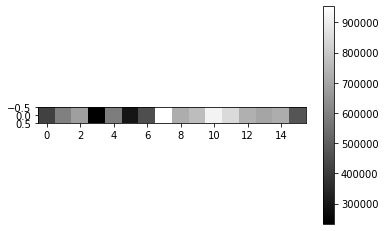

In [6]:
# Create Y and A matrix
# Subtract ambient lighting
# row in scence image, 500 - 545,
# column in scene image, 269 - 1021, 47 for each pattern
black_corrected = np.zeros([1024,1280])
Y = np.zeros([16,1])
A_1d_rand = np.zeros([16,16])
Y_1d_rand = np.zeros([16,1])

for i in range(16):
    # subtract ambient lighting
    black_corrected[:,:] = scene_1drand[:,:,i] - black_subtract_1drand[:,:,i]
    Y_1d_rand[i,0] = np.sum(black_corrected[500:545,269:1021])
    A_1d_rand[i,:] = mask1drand[8,:,i]

A_inv_1d_rand = np.linalg.pinv(A_1d_rand, rcond=1e-1)
X_1d_rand = np.matmul(A_inv_1d_rand, Y_1d_rand)
plt.imshow(np.transpose(X_1d_rand), cmap='gray')
plt.colorbar()
plt.show()


### 2D Identity Reconstruction

In [11]:
# Load data
data_path = file_path.joinpath('C:/Users/russe/OneDrive - Johns Hopkins/FinalProj')

black_subtract_2d = np.loadtxt(data_path.joinpath('blackimg2_59.csv'), delimiter=',')
black_subtract_2d = black_subtract_2d.reshape(1024,1280)
mask2d = np.loadtxt(data_path.joinpath('mask_2d_59.csv'), delimiter=',')
mask2d = mask2d.reshape(16,16,256)
scene_2d = np.loadtxt(data_path.joinpath('scene_2d_59.csv'), delimiter=',')
scene_2d = scene_2d.reshape(1024,1280,256)

In [ ]:
plt.imshow()

In [ ]:
# Create Y and A matrix
# Subtract ambient lighting
# row in scence image, 500 - 545,
# column in scene image, 269 - 1021, 47 for each pattern
black_corrected = np.zeros([1024,1280])
Y = np.zeros([16,1])
A_1d_rand = np.zeros([16,16])
Y_1d_rand = np.zeros([16,1])

for i in range(16):
    # subtract ambient lighting
    black_corrected[:,:] = scene_2d[:,:,i] - black_subtract_2d[:,:]
    Y_1d_rand[i,0] = np.sum(black_corrected[500:545,269:1021])

### 2D Random Reconstruction

In [7]:
# Load data
data_path = file_path.joinpath('C:/Users/russe/OneDrive - Johns Hopkins/FinalProj')

black_subtract_2d = np.loadtxt(data_path.joinpath('blackimg2_59.csv'), delimiter=',')
black_subtract_2d = black_subtract_2d.reshape(1024,1280)
mask_2drand_510 = np.loadtxt(data_path.joinpath('mask_2drand_510.csv'), delimiter=',')
mask_2drand_510 = mask_2drand_510.reshape(16,16,256)
scene_2drand = np.loadtxt(data_path.joinpath('scene_2drand_crop.csv'), delimiter=',')
scene_2drand = scene_2drand.reshape(1024,1280,256)

C:\Users\russe\AppData\Local\Temp/ipykernel_29360/4252725886.py:8: UserWarning: loadtxt: Empty input file: "C:\Users\russe\OneDrive - Johns Hopkins\FinalProj\scene_2drand_crop.csv"
  scene_2drand = np.loadtxt(data_path.joinpath('scene_2drand_crop.csv'), delimiter=',')


ValueError: cannot reshape array of size 0 into shape (1024,1280,256)

## M << N

In [ ]:
# Compressed Sensing Alg 1
# Solve y = A*x for x using L1 minimum norm solution
def L1_norm(x):
    return np.linal.norm(x, ord=1)

constr = ({'type': 'eq', 'fun': lambda x: A @ x - y})
x0 = np.linalg.pinv(A) @ y # initialize minimization with L2 solution
res = minimize(L1_norm, x0, method='SLSQP', constraints=constr)
x_L1 = res.x

plt.imshow(x_L1)
plt.colorbar()
plt.show()